Use Diabetes Data in Maryland to predict the Number of deaths due to diabetes in a given year.
Diabetes Health Data can be found here  https://www.healthdata.gov/ 
We are using "Number of Diabetes Deaths among Maryland Residents, 1920-2016" dataset.
Learn more about Diabetes here: http://www.who.int/en/news-room/fact-sheets/detail/diabetes
- Project 1: - The Goal is to be abole to able to understand concepts like data exploration, data cleansing, feature selection, model selection, model evaluation and apply them in a practical way.
- Project 2: -And also to use the new healthcareai library for  health Data Science projects!

In [123]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import healthcareai
import seaborn as sn
#import pyplot
#import pygal
import os, re, sys

In [124]:
print("Numpy Version: = %s" %np.__version__)
print("Pandas Version: = %s" %pd.__version__)
print("Matplotlib Version: = %s" %matplotlib.__version__)
print("Seaborn Version: = %s" %sn.__version__)

Numpy Version: = 1.14.5
Pandas Version: = 0.23.0
Matplotlib Version: = 2.2.2
Seaborn Version: = 0.8.1


Project 1: Using healthcareai, we train our model on dataset and then 
use that to predict the number of diabetes deaths we expect in 2017 and 2018.

In [125]:
df = pd.read_csv("../datasets/Number_of_Diabetes_Deaths_among_Maryland_Residents__1920-2016.csv")
df.columns
df.rename(columns={'Number of Diabetes Deaths':'Deaths'}, inplace=True)
df.columns

Index(['Year', 'Deaths'], dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faf9b5e2940>]],
      dtype=object)

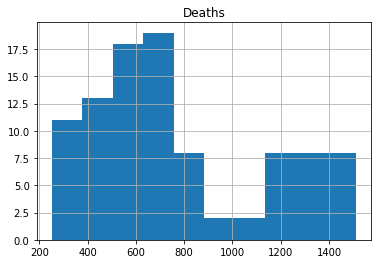

In [126]:
# Checkout the data
df.hist("Deaths")

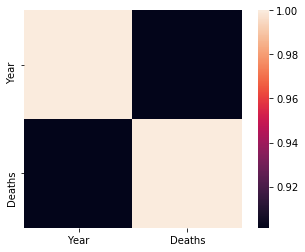

In [127]:
# Any Correlation?:
cor = df.corr()
sn.heatmap(cor, square=True)

clearly No correlation between columns whatsoever. So these are linearly independent colums good for prediction analysis.

Lets do some cleaning by addressing the followings issues:
- 1)Duplicate or irrelevant observations.
- 2)Bad labeling of data, same category occurring multiple times.
- 3)Missing or null data points.
- 4) Unexpected outliers.

In [128]:
# any Null or Missing data
df.isnull().sum()
df.isna().sum()

Year      0
Deaths    0
dtype: int64

In [129]:
# No Null or Missing Data so we are good
# so lets check for inconsistent data e.g year = 0
print("Zero Year count = {}".format(df[df.Year == 0 ].shape[0]))

# Now we prepare the data for prediction
X_data = df.drop('Deaths', axis=1)
Y_data = df[['Deaths']]

Zero Year count = 0


In [130]:
# Import models from Sklearn
#clustering Models
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation # clustering
from sklearn.mixture import GaussianMixture # for GMM clustering
#Linear models
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression
from sklearn import metrics
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score

In [131]:
# split our model
from sklearn.model_selection import train_test_split
# Split X and Y into Test and Train portions
# simple Plitting
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.25, random_state=1)

In [132]:
# create model and Train it!
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [133]:
# check out our model coefficients
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[0][idx]))
# check Model Intercepts
intercept = model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The coefficient for Year is 11.663262842768017
The intercept for our model is -22166.247849754734


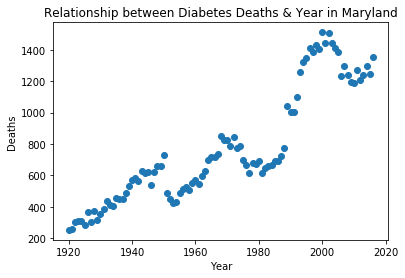

In [134]:
# see some ploting relationships between our features
plt.scatter(df.Year, df.Deaths)
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.title("Relationship between Diabetes Deaths & Year in Maryland")
plt.show()

In [135]:
# check model score
model.score(X_test, Y_test)

0.7749927173454213

So in our model 77.5 % of variability can be explained by X which is Year.
What about our models mean square error and RMSE in Prediction?

In [146]:
from sklearn.metrics import mean_squared_error
y_predict = model.predict(X_test)
model_mse = mean_squared_error(y_predict, Y_test)

from math import sqrt
model_rmse = sqrt(model_mse)
print("Model Mean Sqaured Error(MSE) = {}".format(model_mse))
print("Model Root Mean Sqaured Error(RMSE) = {}".format(model_rmse))
print("\n")
#df.head(5)
# prediction of the first 5 years i.e 1920, 1921, 1922, 1923, 1924
print("----------\Actual Deaths for 1920, 1921, 1922, 1923, 1924\---------------------------------")
print("Actual Death of frist 5 years = {}".format(df.Deaths[:5]))
print("----------\Predicted Deaths for 1920, 1921, 1922, 1923, 1924\---------------------------------")
print("Predicted Death of frist 5 years = {}".format(model.predict(X_data)[:5]))

Model Mean Sqaured Error(MSE) = 27107.275362371154
Model Root Mean Sqaured Error(RMSE) = 164.64287218817324


----------\Actual Deaths for 1920, 1921, 1922, 1923, 1924\---------------------------------
Actual Death of frist 5 years = 0    252
1    259
2    303
3    308
4    310
Name: Deaths, dtype: int64
----------\Predicted Deaths for 1920, 1921, 1922, 1923, 1924\---------------------------------
Predicted Death of frist 5 years = [[227.21680836]
 [238.8800712 ]
 [250.54333405]
 [262.20659689]
 [273.86985973]]


Lets use our model to make some random predictions now and see how our predictions fair

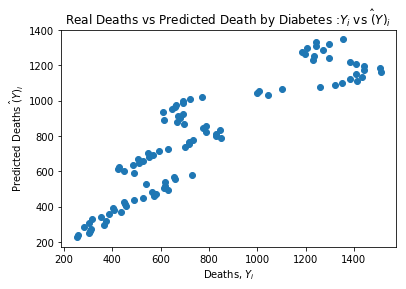

In [137]:
# make some scatter plot of our deaths predictions vs Real Deaths
plt.scatter(df.Deaths, model.predict(X_data))
plt.xlabel("Deaths, $Y_{i}$")
plt.ylabel("Predicted Deaths $\hat(Y)_i$")
plt.title("Real Deaths vs Predicted Death by Diabetes :$Y_i$ vs $\hat(Y)_i$ ")
plt.show()

Some really slight correlation between our prediction deaths and actual deaths indicating that LinearRegression might not be the best to use for this model. Maybe polynomial regression model.
Since our dataset is very small, we could rather do cross-validation test-train fit
and see what we get.

In [115]:
# using cross validation Test-train split into 3
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X_data, Y_data, test_size=0.33, random_state=5)
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

predict_train = lin_reg.predict(X_train)
predict_test = lin_reg.predict(X_test)

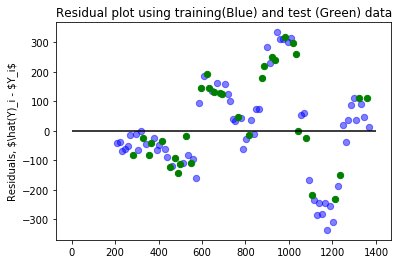

In [121]:
# Now we calculate the MSE and RMSE for Train and Test Data  and make a scatter plot
plt.scatter(lin_reg.predict(X_train), lin_reg.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lin_reg.predict(X_test), lin_reg.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin = 0, xmax = 1400)
plt.title("Residual plot using training(Blue) and test (Green) data")
plt.ylabel("Residuals, $\hat(Y)_i - $Y_i$")
plt.show()

In [154]:
# Try some prediction for future years
model.predict(np.array([2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]).reshape(-1,1))

array([[1358.55330411],
       [1370.21656695],
       [1381.87982979],
       [1393.54309264],
       [1405.20635548],
       [1416.86961832],
       [1428.53288116],
       [1440.19614401],
       [1451.85940685]])

Clearly there is huge variation between the predicts and a better learning model will be to use
Neural networks where one can clearly control predictability using Hyperparameters.
Next part will be to implement a simple Neural network(Deep Learning) to predict the
deaths for each year.

Paorject 2: using HealthCareAI library class to compare Models and use different sources of Datasets e.g MySQL data bases

#import healthcareai.trained_models.trained_supervised_model as tsm_plots
#import healthcareai.common.database_connections as hcai_db
#dataframe = healthcareai.load_csv("../datasets/Number_of_Diabetes_Deaths_among_Maryland_Residents__1920-2016.csv")
#dataframe.head(5)
#dataframe.dtypes
#dataframe.shape

'''
def main():
    # Load the included diabetes sample data
    dataframe = healthcareai.load_diabetes()

    # ...or load your own data from a .csv file: Uncomment to pull data from your CSV
    # dataframe = healthcareai.load_csv('path/to/your.csv')

    # ...or load data from a MSSQL server: Uncomment to pull data from MSSQL server
    # server = 'localhost'
    # database = 'SAM'
    # query = """SELECT *
    #             FROM [SAM].[dbo].[DiabetesClincialSampleData]
    #             -- In this step, just grab rows that have a target
    #             WHERE ThirtyDayReadmitFLG is not null"""
    #
    # engine = hcai_db.build_build_mssql_engine_using_trusted_connectionsmssql_engine(server=server, database=database)
    # dataframe = pd.read_sql(query, engine)

    # Peek at the first 5 rows of data
    print(dataframe.head(5))

    # Drop columns that won't help machine learning
    dataframe.drop(['PatientID'], axis=1, inplace=True)

    # Step 1: Setup a healthcareai classification trainer. This prepares your data for model building
    classification_trainer = healthcareai.SupervisedModelTrainer(
        dataframe=dataframe,
        predicted_column='ThirtyDayReadmitFLG',
        model_type='classification',
        grain_column='PatientEncounterID',
        impute=True,
        verbose=False)

    # Look at the first few rows of your dataframe after loading the data
    print('\n\n-------------------[ Cleaned Dataframe ]--------------------------')
    print(classification_trainer.clean_dataframe.head())

    # Step 2: train some models

    # Train a KNN model
    trained_knn = classification_trainer.knn()

    # View the ROC and PR plots
    trained_knn.roc_plot()
    trained_knn.pr_plot()

    # Uncomment if you want to see all the ROC and/or PR thresholds
    # trained_knn.roc()
    # trained_knn.pr()

    # Train a logistic regression model
    trained_lr = classification_trainer.logistic_regression()

    # View the ROC and PR plots
    trained_lr.roc_plot()
    trained_lr.pr_plot()

    # Uncomment if you want to see all the ROC and/or PR thresholds
    # trained_lr.roc()
    # trained_lr.pr()

    # Train a random forest model and view the feature importance plot
    trained_random_forest = classification_trainer.random_forest(save_plot=False)
    # View the ROC and PR plots
    trained_random_forest.roc_plot()
    trained_random_forest.pr_plot()

    # Uncomment if you want to see all the ROC and/or PR thresholds
    # trained_random_forest.roc()
    # trained_random_forest.pr()

    # Create a list of all the models you just trained that you want to compare
    models_to_compare = [trained_knn, trained_lr, trained_random_forest]

    # Create a ROC plot that compares them.
    tsm_plots.tsm_classification_comparison_plots(
        trained_supervised_models=models_to_compare,
        plot_type='ROC',
        save=False)

    # Create a PR plot that compares them.
    tsm_plots.tsm_classification_comparison_plots(
        trained_supervised_models=models_to_compare,
        plot_type='PR',
        save=False)

    # Once you are happy with the performance of any model, you can save it for use later in predicting new data.
    # File names are timestamped and look like '2017-05-31T12-36-21_classification_RandomForestClassifier.pkl')
    # Note the file you saved and that will be used in example_classification_2.py
    trained_random_forest.save()
'''

In [122]:
if __name__ == "__main__":
    main()